In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [22]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [25]:
# !!!
y = y.reshape(-1,1)
y.shape

(506, 1)

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

### Hyperparameters

In [29]:
learning_rate = 0.025
num_epochs = 100

### Define the model

In [30]:
model = Sequential()

# Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
#       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#       bias_constraint=None, **kwargs)
# `Dense` implements the operation:
# `output = activation(dot(input, kernel) + bias)`
model.add(Dense(output_dim, input_dim = input_dim, kernel_initializer='normal')) # activation = None for regression

### Compile model

In [31]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = learning_rate))

In [32]:
# number of parameters = num. features + bias
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [33]:
history = model.fit(X_train, y_train, epochs = num_epochs)

Epoch 1/100
404/404 [==============================] - 0s - loss: 580.6977     
Epoch 2/100
404/404 [==============================] - 0s - loss: 546.8969     
Epoch 3/100
404/404 [==============================] - 0s - loss: 525.9076     
Epoch 4/100
404/404 [==============================] - 0s - loss: 505.3357     
Epoch 5/100
404/404 [==============================] - 0s - loss: 488.5617     
Epoch 6/100
404/404 [==============================] - 0s - loss: 472.5433     
Epoch 7/100
404/404 [==============================] - 0s - loss: 457.5103     
Epoch 8/100
404/404 [==============================] - 0s - loss: 443.0399     
Epoch 9/100
404/404 [==============================] - 0s - loss: 429.1353     
Epoch 10/100
404/404 [==============================] - 0s - loss: 415.5493     
Epoch 11/100
404/404 [==============================] - 0s - loss: 402.1517     
Epoch 12/100
404/404 [==============================] - 0s - loss: 389.7156     
Epoch 13/100
404/404 [===============

### get model weights

In [34]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print("\n\nTraining cost: ", "{:.4f}".format(train_score))
print("\nTest cost: ", "{:.4f}".format(test_score))

 32/102 [========>.....................] - ETA: 0s

Training cost:  25.1813

Test cost:  41.4371


In [35]:
model.get_weights()

[array([[-0.90597087],
        [ 0.87305892],
        [-0.34698918],
        [ 0.64597082],
        [-1.47037065],
        [ 2.72452331],
        [-0.20917001],
        [-2.62462306],
        [ 1.13604772],
        [-0.91852814],
        [-2.23364854],
        [ 0.75166243],
        [-3.51368237]], dtype=float32), array([ 20.22927666], dtype=float32)]

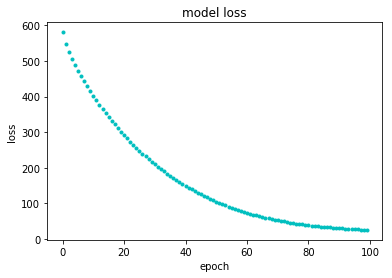

In [36]:
plt.plot(history.history['loss'], 'c.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Get predictions

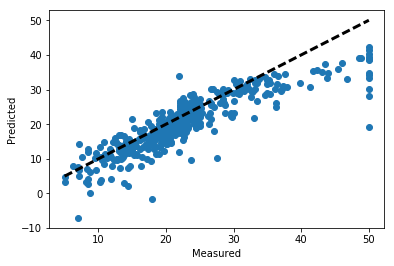

In [37]:
pred_train = model.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

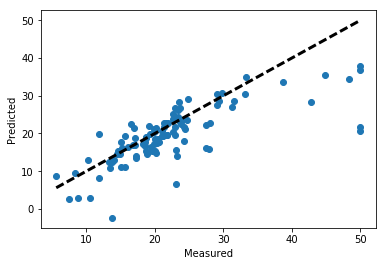

In [38]:
pred_test = model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [40]:
pred_train.shape

(404, 1)